# Imports

In [15]:
import os
import glob

import pandas as pd
import numpy as np

from google.colab import drive

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Functions

In [16]:
def combine_raw_df(folder_path: str):
  all_files = os.listdir(folder_path)

  csv_files = [f for f in all_files if f.endswith('.csv')]

  df_list = []

  for csv in csv_files:
    file_path = os.path.join(folder_path, csv)
    df = pd.read_csv(file_path)
    df_list.append(df)

  big_df = pd.concat(df_list, ignore_index=True)
  return big_df

In [17]:
def get_tdf(df):

  max_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].max()
  min_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].min()
  mean_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].mean()
  kurt_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].kurt()
  skew_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].skew()
  std_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].std()
  var_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].var()
  median_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].median()
  # idxmax_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].idxmax()
  # idxmin_values = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].idxmin()

  tdf_features = {
    'max_accelerometer_X': max_values['accelerometer_X'],
    'max_accelerometer_Y': max_values['accelerometer_Y'],
    'max_accelerometer_Z': max_values['accelerometer_Z'],

    'min_accelerometer_X': min_values['accelerometer_X'],
    'min_accelerometer_Y': min_values['accelerometer_Y'],
    'min_accelerometer_Z': min_values['accelerometer_Z'],

    'mean_accelerometer_X': mean_values['accelerometer_X'],
    'mean_accelerometer_Y': mean_values['accelerometer_Y'],
    'mean_accelerometer_Z': mean_values['accelerometer_Z'],

    'kurt_accelerometer_X': kurt_values['accelerometer_X'],
    'kurt_accelerometer_Y': kurt_values['accelerometer_Y'],
    'kurt_accelerometer_Z': kurt_values['accelerometer_Z'],

    'skew_accelerometer_X': skew_values['accelerometer_X'],
    'skew_accelerometer_Y': skew_values['accelerometer_Y'],
    'skew_accelerometer_Z': skew_values['accelerometer_Z'],

    'std_accelerometer_X': std_values['accelerometer_X'],
    'std_accelerometer_Y': std_values['accelerometer_Y'],
    'std_accelerometer_Z': std_values['accelerometer_Z'],

    'var_accelerometer_X': var_values['accelerometer_X'],
    'var_accelerometer_Y': var_values['accelerometer_Y'],
    'var_accelerometer_Z': var_values['accelerometer_Z'],

    'median_accelerometer_X': median_values['accelerometer_X'],
    'median_accelerometer_Y': median_values['accelerometer_Y'],
    'median_accelerometer_Z': median_values['accelerometer_Z'],

    # 'idxmax_accelerometer_X': idxmax_values['accelerometer_X'],
    # 'idxmax_accelerometer_Y': idxmax_values['accelerometer_Y'],
    # 'idxmax_accelerometer_Z': idxmax_values['accelerometer_Z'],

    # 'idxmin_accelerometer_X': idxmin_values['accelerometer_X'],
    # 'idxmin_accelerometer_Y': idxmin_values['accelerometer_Y'],
    # 'idxmin_accelerometer_Z': idxmin_values['accelerometer_Z'],
  }

  return tdf_features

In [18]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [19]:
def get_activity_tdf_dataset(raw_df, activity, time):
  t = time  # set time

  raw_activity_df = raw_df[raw_df.activity.isin([activity])]

  df_list = [raw_activity_df[i:i+t] for i in range(0, raw_activity_df.shape[0], t)]

  tdf_list = [get_tdf(df) for df in df_list]

  tdf_activity_df = pd.DataFrame(tdf_list)
  tdf_activity_df['time'] = f'{t} sec.'
  tdf_activity_df['activity'] = activity
  return tdf_activity_df

# Drive connection

In [20]:
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/materials/homework5/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Activities list

In [21]:
activities = os.listdir(data_path)
activities

['stairs', 'walking', 'idle', 'running']

# Raw DataSet

In [22]:
# Raw DataSet preparation
raw_dataset_df = None
for activity in activities:
  _df = combine_raw_df(os.path.join(data_path, activity))
  _df['activity'] = activity
  raw_dataset_df = pd.concat([raw_dataset_df, _df])

## Visualization

In [23]:
raw_dataset_df

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,2.226608,-7.575254,-12.555194,stairs
1,3.284845,-11.966220,-3.892972,stairs
2,3.945645,-11.760319,-8.097190,stairs
3,2.801216,-9.327810,-5.133168,stairs
4,-1.350330,-3.380613,-0.057461,stairs
...,...,...,...,...
102235,33.624170,17.635689,21.174320,running
102236,0.536301,10.347740,0.316035,running
102237,5.731719,-8.796297,-0.861913,running
102238,2.360683,11.913548,3.936068,running


Text(0.5, 0, 'accelerometer_Z')

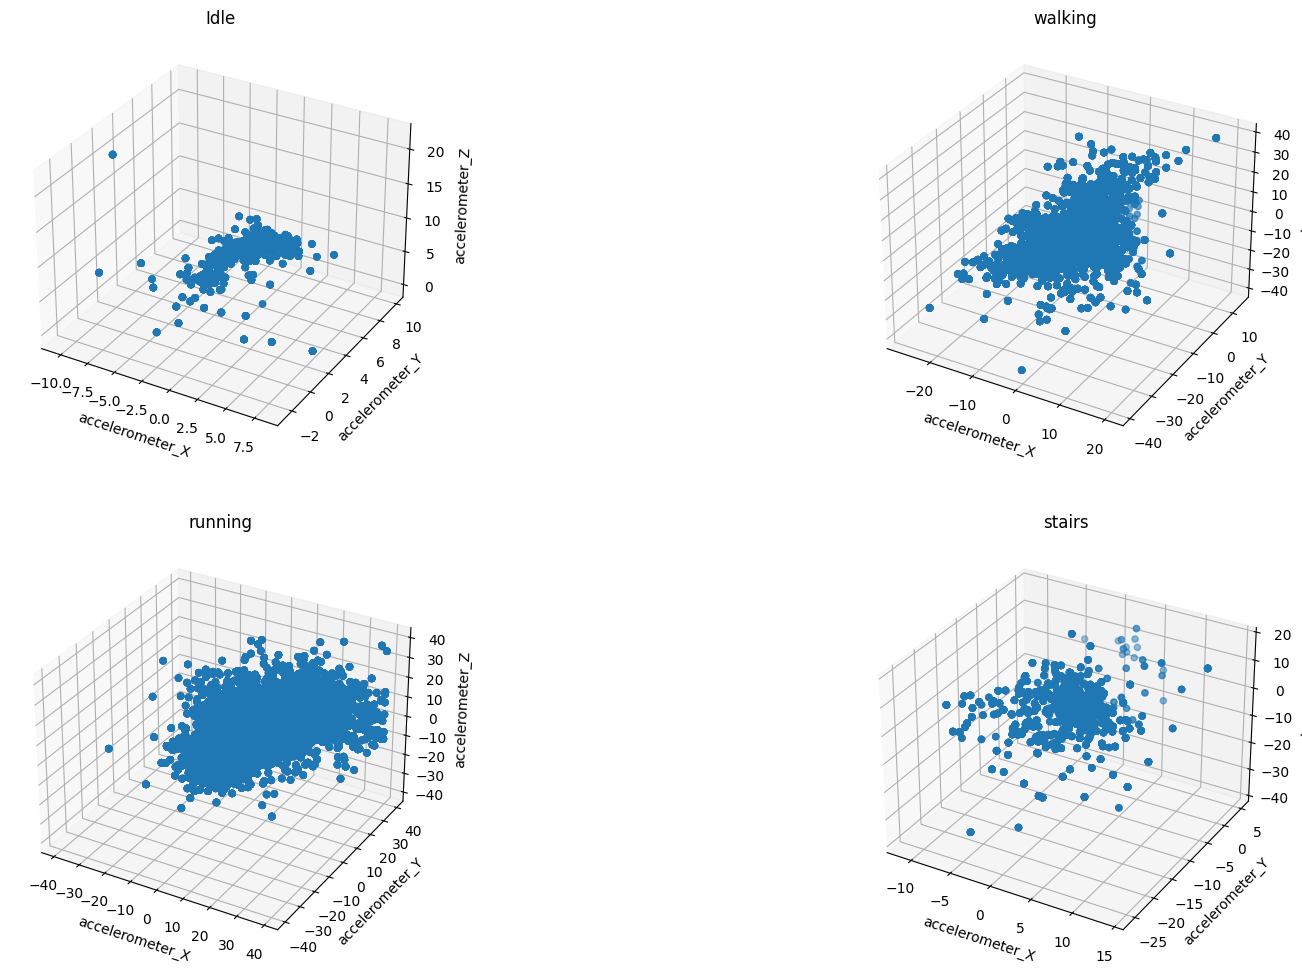

In [24]:
plt.figure(figsize = (20, 12))
fig = plt.subplot(2, 2, 1, projection='3d')

# idle
fig.scatter3D(
  raw_dataset_df[raw_dataset_df.activity.isin(['idle'])]['accelerometer_X'],
  raw_dataset_df[raw_dataset_df.activity.isin(['idle'])]['accelerometer_Y'],
  raw_dataset_df[raw_dataset_df.activity.isin(['idle'])]['accelerometer_Z'],
  marker='o'
)
plt.title('Idle')
fig.set_xlabel('accelerometer_X')
fig.set_ylabel('accelerometer_Y')
fig.set_zlabel('accelerometer_Z')

# walking
fig = plt.subplot(2, 2, 2, projection='3d')
fig.scatter3D(
  raw_dataset_df[raw_dataset_df.activity.isin(['walking'])]['accelerometer_X'],
  raw_dataset_df[raw_dataset_df.activity.isin(['walking'])]['accelerometer_Y'],
  raw_dataset_df[raw_dataset_df.activity.isin(['walking'])]['accelerometer_Z'],
  marker='o'
)
plt.title('walking')
fig.set_xlabel('accelerometer_X')
fig.set_ylabel('accelerometer_Y')
fig.set_zlabel('accelerometer_Z')

# running
fig = plt.subplot(2, 2, 3, projection='3d')
fig.scatter3D(
  raw_dataset_df[raw_dataset_df.activity.isin(['running'])]['accelerometer_X'],
  raw_dataset_df[raw_dataset_df.activity.isin(['running'])]['accelerometer_Y'],
  raw_dataset_df[raw_dataset_df.activity.isin(['running'])]['accelerometer_Z'],
  marker='o'
)
plt.title('running')
fig.set_xlabel('accelerometer_X')
fig.set_ylabel('accelerometer_Y')
fig.set_zlabel('accelerometer_Z')

# stairs
fig = plt.subplot(2, 2, 4, projection='3d')
fig.scatter3D(
  raw_dataset_df[raw_dataset_df.activity.isin(['stairs'])]['accelerometer_X'],
  raw_dataset_df[raw_dataset_df.activity.isin(['stairs'])]['accelerometer_Y'],
  raw_dataset_df[raw_dataset_df.activity.isin(['stairs'])]['accelerometer_Z'],
  marker='o'
)
plt.title('stairs')
fig.set_xlabel('accelerometer_X')
fig.set_ylabel('accelerometer_Y')
fig.set_zlabel('accelerometer_Z')

## Raw DataSet Models

In [25]:
features = raw_dataset_df.drop('activity', axis=1)
labels = raw_dataset_df['activity']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=10)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# SVM, kernel='linear'
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)

svm_linear_report = classification_report(y_test, svm_linear_pred, zero_division=1)
print("Classification Report for SVM linear:\n", svm_linear_report)

Classification Report for SVM linear:
               precision    recall  f1-score   support

        idle       0.81      0.78      0.79     10321
     running       0.86      0.85      0.85     33771
      stairs       1.00      0.00      0.00      1627
     walking       0.77      0.86      0.81     18255

    accuracy                           0.82     63974
   macro avg       0.86      0.62      0.61     63974
weighted avg       0.83      0.82      0.81     63974



In [27]:
# SVM, kernel='rbf'
svm_rbf = SVC(decision_function_shape='ovo', kernel='rbf', gamma=0.005, probability=True)
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)

svm_rbf_report = classification_report(y_test, svm_rbf_pred, zero_division=1)
print("Classification Report for SVM linear:\n", svm_rbf_report)

Classification Report for SVM linear:
               precision    recall  f1-score   support

        idle       0.86      0.93      0.89     10321
     running       0.91      0.87      0.89     33771
      stairs       1.00      0.00      0.00      1627
     walking       0.78      0.88      0.82     18255

    accuracy                           0.86     63974
   macro avg       0.89      0.67      0.65     63974
weighted avg       0.87      0.86      0.85     63974



In [28]:
# Random Forest model
rfm = RandomForestClassifier(n_estimators=15, max_depth = None)
rfm.fit(X_train, y_train)
rfm_pred = rfm.predict(X_test)

rfm_report = classification_report(y_test, rfm_pred, zero_division=1)
print("\nClassification Report for Random Forest:\n", rfm_report)


Classification Report for Random Forest:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00     10321
     running       1.00      1.00      1.00     33771
      stairs       1.00      0.99      1.00      1627
     walking       1.00      1.00      1.00     18255

    accuracy                           1.00     63974
   macro avg       1.00      1.00      1.00     63974
weighted avg       1.00      1.00      1.00     63974



## Visualization

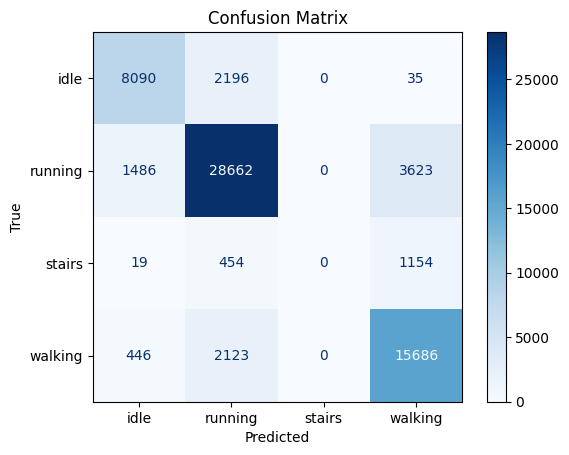

In [29]:
# SVM, kernel='linear'
plot_confusion_matrix(y_test, svm_linear_pred, labels=svm_linear.classes_)

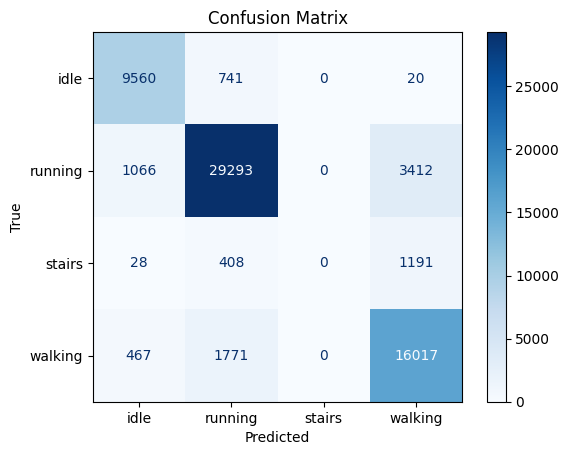

In [30]:
# SVM, kernel='rbf'
plot_confusion_matrix(y_test, svm_rbf_pred, labels=svm_rbf.classes_)

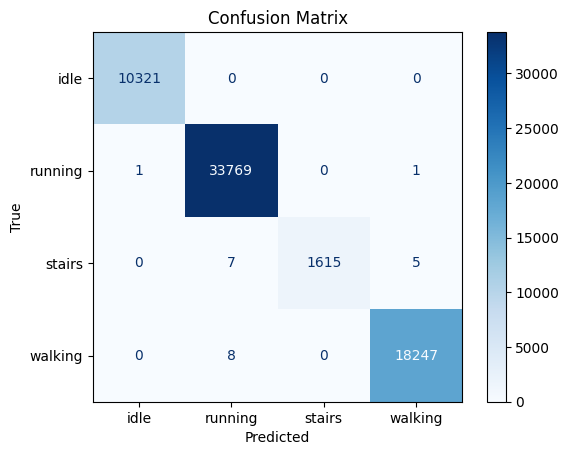

In [31]:
# Random Forest model
plot_confusion_matrix(y_test, rfm_pred, labels=rfm.classes_)

# DataSet with time domain features (tdf)

In [32]:
# DataSet with time domain features preparation
tdf_dataset_df = None
time = 30 # sec

for activity in activities:
  _df = get_activity_tdf_dataset(raw_dataset_df, activity, time)
  tdf_dataset_df = pd.concat([tdf_dataset_df, _df])

In [33]:
tdf_dataset_df

,max_accelerometer_X,max_accelerometer_Y,max_accelerometer_Z,min_accelerometer_X,min_accelerometer_Y,min_accelerometer_Z,mean_accelerometer_X,mean_accelerometer_Y,mean_accelerometer_Z,kurt_accelerometer_X,...,std_accelerometer_Y,std_accelerometer_Z,var_accelerometer_X,var_accelerometer_Y,var_accelerometer_Z,median_accelerometer_X,median_accelerometer_Y,median_accelerometer_Z,time,activity
0,3.945645,-3.380613,0.885855,-7.805097,-15.964537,-12.555194,-0.295125,-8.023768,-2.545515,1.120731,...,2.972231,2.816823,7.037902,8.834159,7.934492,-0.478841,-7.527370,-2.154781,30 sec.,stairs
1,8.398860,-2.715025,6.775591,-6.224924,-17.501614,-26.230873,0.826638,-8.694463,-4.078762,2.275576,...,3.207309,5.479692,7.040978,10.286829,30.027026,1.244985,-9.035717,-3.584120,30 sec.,stairs
2,8.073248,2.973599,10.582372,-4.582502,-17.300500,-14.422671,2.830745,-7.161376,-0.104068,-0.453013,...,4.710145,4.512922,10.904337,22.185466,20.366468,3.447650,-7.153874,0.019154,30 sec.,stairs
3,3.945645,-3.380613,9.706094,-7.805097,-17.927782,-8.097190,-0.643721,-8.497501,-1.855506,1.088112,...,3.679735,3.064641,6.579925,13.540450,9.392026,-0.689530,-7.922414,-1.903390,30 sec.,stairs
4,8.398860,-3.380613,0.885855,-7.805097,-13.771448,-26.230873,0.052992,-7.955932,-3.827690,1.188594,...,2.599952,5.093963,10.734674,6.759750,25.948460,0.502782,-7.527370,-2.861071,30 sec.,stairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,32.953793,26.953922,19.292477,-2.896984,-10.261548,-4.745308,8.345708,8.995974,3.242388,0.559748,...,10.523073,6.987067,98.774530,110.735062,48.819111,6.004658,8.633491,0.292093,30 sec.,running
3404,32.953793,23.520638,19.292477,-3.045424,-10.261548,-14.480132,5.738902,5.580086,3.462973,4.793988,...,7.706611,7.935688,76.095406,59.391858,62.975137,3.598485,6.878541,2.427721,30 sec.,running
3405,37.703888,24.195803,33.959360,-6.110002,-12.660539,-10.472239,6.022215,5.853504,4.965415,2.930642,...,9.215085,11.472402,109.909488,84.917794,131.615998,3.507506,7.216124,-0.754173,30 sec.,running
3406,27.226862,17.918205,16.089035,-1.833958,-11.765107,-5.985504,7.668948,6.028919,5.073154,0.723022,...,6.861132,5.870099,63.772188,47.075137,34.458062,4.508282,6.754043,3.897761,30 sec.,running


## TDF DataSeta Models

In [34]:
features = tdf_dataset_df.drop(['activity', 'time'], axis=1)
labels = tdf_dataset_df['activity']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=10)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# SVM, kernel='linear'
svm_linear = SVC(kernel='linear',  probability=True)
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)

svm_linear_report = classification_report(y_test, svm_linear_pred, zero_division=1)
print("Classification Report for SVM linear:\n", svm_linear_report)

Classification Report for SVM linear:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00       351
     running       1.00      1.00      1.00      1092
      stairs       0.79      0.71      0.75        59
     walking       0.97      0.98      0.98       631

    accuracy                           0.99      2133
   macro avg       0.94      0.92      0.93      2133
weighted avg       0.99      0.99      0.99      2133



In [36]:
# SVM, kernel='rbf'
svm_rbf = SVC(decision_function_shape='ovo', kernel='rbf', gamma=0.005, probability=True)
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)

svm_rbf_report = classification_report(y_test, svm_rbf_pred, zero_division=1)
print("Classification Report for SVM linear:\n", svm_rbf_report)

Classification Report for SVM linear:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00       351
     running       1.00      1.00      1.00      1092
      stairs       1.00      0.14      0.24        59
     walking       0.93      1.00      0.96       631

    accuracy                           0.98      2133
   macro avg       0.98      0.78      0.80      2133
weighted avg       0.98      0.98      0.97      2133



In [37]:
# Random Forest model
rfm = RandomForestClassifier(n_estimators=15, max_depth = None)
rfm.fit(X_train, y_train)
rfm_pred = rfm.predict(X_test)

rfm_report = classification_report(y_test, rfm_pred, zero_division=1)
print("\nClassification Report for Random Forest:\n", rfm_report)


Classification Report for Random Forest:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00       351
     running       1.00      1.00      1.00      1092
      stairs       0.98      0.97      0.97        59
     walking       1.00      1.00      1.00       631

    accuracy                           1.00      2133
   macro avg       0.99      0.99      0.99      2133
weighted avg       1.00      1.00      1.00      2133



## Visualization

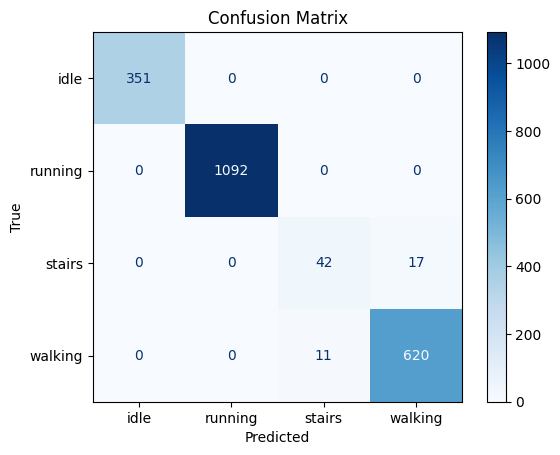

In [38]:
# SVM, kernel='linear'
plot_confusion_matrix(y_test, svm_linear_pred, labels=svm_linear.classes_)

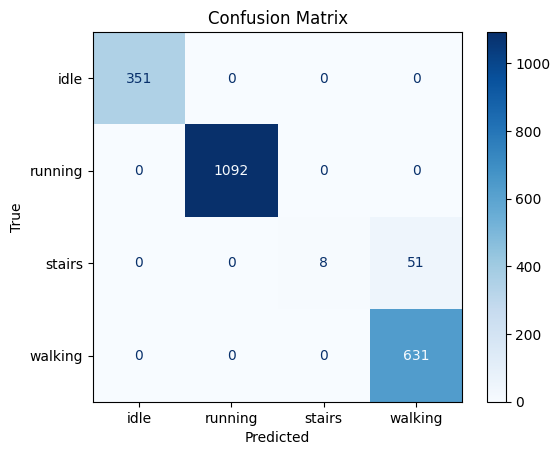

In [39]:
# SVM, kernel='rbf'
plot_confusion_matrix(y_test, svm_rbf_pred, labels=svm_rbf.classes_)

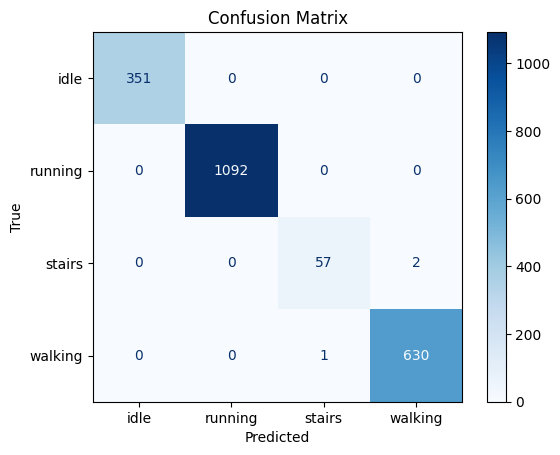

In [40]:
# Random Forest model
plot_confusion_matrix(y_test, rfm_pred, labels=rfm.classes_)